In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


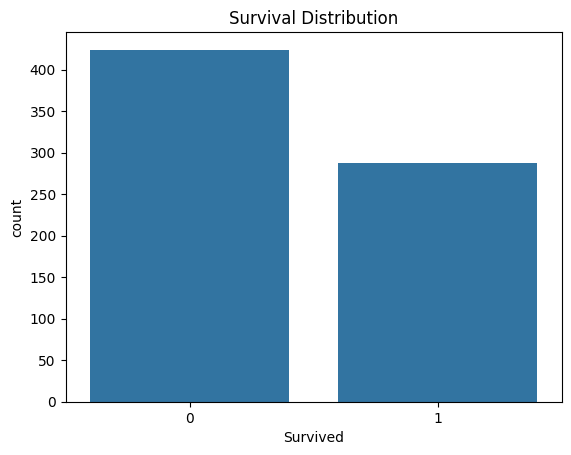

In [12]:

sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

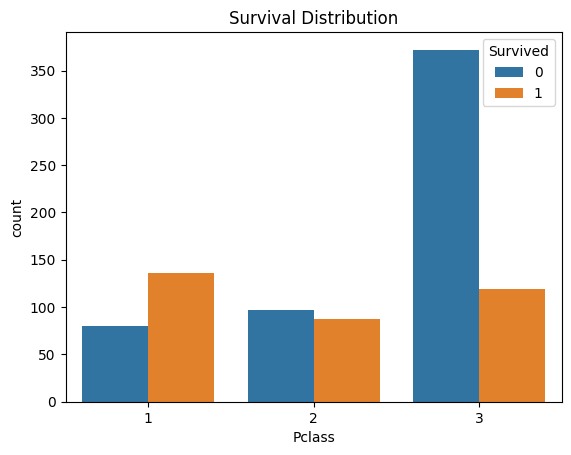

In [8]:

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

In [12]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin']) 

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [15]:
df = df.dropna(subset=['Age', 'Embarked'])  # Drop rows where essential columns have missing values

In [16]:
df['Sex'].value_counts()

Sex
male      453
female    259
Name: count, dtype: int64

In [17]:
#One -hot encoding
# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Sex_male     712 non-null    bool   
 8   Embarked_Q   712 non-null    bool   
 9   Embarked_S   712 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 46.6 KB


In [19]:


X = df.drop('Survived', axis=1)  
y = df['Survived']

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)  # k= 5 nearest neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test)

In [25]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.79


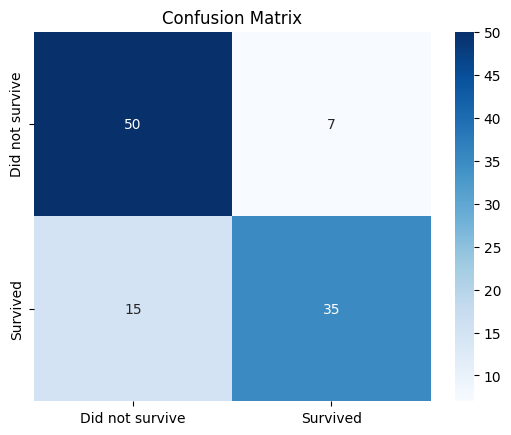

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        57
           1       0.83      0.70      0.76        50

    accuracy                           0.79       107
   macro avg       0.80      0.79      0.79       107
weighted avg       0.80      0.79      0.79       107



In [ ]:
#Classificsation Report
# Precision (Aniqlik): Qancha prognoz qilingan positiv aslida positive ekanligini o'lchaydi.
# Recall (Esdalik): Aslida Postive bo'lgan qanchadan-qancha holatlar model tomonidan to'g'ri aniqlanganligini o'lchaydi.
# F1-Score: Aniqlik va esdalik o'rtasidagi muvozanat, ikkala o'lchov ham muhim bo'lganda foydalidir.
# Support (Qo'llab-quvvatlash): Har bir sinfning ma'lumotlar to'plamidagi haqiqiy ulushlari soni.

In [26]:
# k-fold K=10
cv_scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation

In [27]:
# Print the results of cross-validation
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean accuracy from cross-validation: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores for each fold: [0.59722222 0.59722222 0.29577465 0.42253521 0.53521127 0.4084507
 0.43661972 0.5915493  0.71830986 0.67605634]
Mean accuracy from cross-validation: 0.53
Standard deviation of cross-validation scores: 0.13


In [ ]:
#Standard deviation of cross-validation scores: 0.13


In [28]:
scaler_x = StandardScaler()

In [29]:
X = scaler.fit_transform(X)

In [30]:
# k-fold K=10
cv_scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation

In [31]:
 cv_scores

array([0.80555556, 0.80555556, 0.76056338, 0.78873239, 0.78873239,
       0.73239437, 0.84507042, 0.73239437, 0.81690141, 0.84507042])

In [32]:
# Print the results of cross-validation
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean accuracy from cross-validation: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores for each fold: [0.80555556 0.80555556 0.76056338 0.78873239 0.78873239 0.73239437
 0.84507042 0.73239437 0.81690141 0.84507042]
Mean accuracy from cross-validation: 0.79
Standard deviation of cross-validation scores: 0.04


In [ ]:
# Print the results of cross-validation
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean accuracy from cross-validation: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

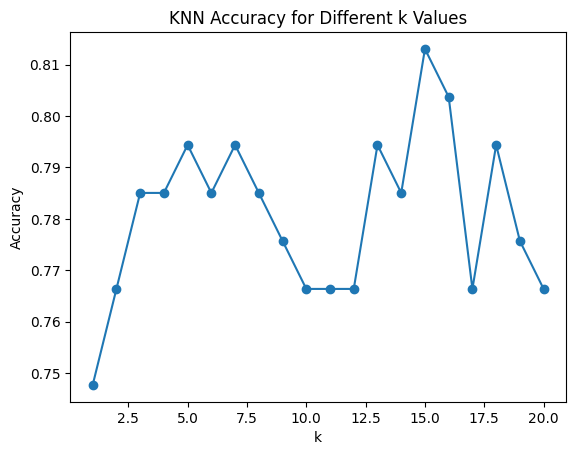

In [24]:
k_values = range(1, 21)
accuracy_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_list.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(k_values, accuracy_list, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()